## Task
>The dataset is an income of individuals with different features. The aim of this project is to build a model that will accurately predict the income of an individual whether or not an adult makes more than 50000 US Dollars in a year on the basis of the features given.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
#1. load the dataset
#2. check for missing values and inconsistencies in data set
#3. Data Processing 
# Select the best feautures in the dataset
# split data set into training and testing 
#4. Normalization
# 5.Fit the model
#6.Evaluating 
#7. Fine tunning 
#8.Predict the test data set

In [3]:
df= pd.read_csv('adult.csv')
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Questions 
>What type of Machine learning problem is this and identify the target variable

>Checking for missing values in the dataset (in this particular dataset, there are inconsistency values like “?”)how to deal with these values?

>Check for the shape of the dataframe?

>Explore the important columns and give insight based on the columns

>Check for skewness and outliers in the dataset

>Use a transformer to transform the columns above

## What type of Machine learning problem is this and identify the target variable
>This is a classification problem, where the target variable 'income' is either <=50K or >50K.

In [4]:
df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

## Checking for missing values in the dataset (in this particular dataset,there are inconsistency values like “?",how do we deal with these values?
>Dealing with missing or inconsistent values is a common task in preprocessing data for machine learning. we can handle missing or inconsistent values by replacing them with a default value such as the mean, median or mode of the column or simply remove the rows containing the missing values,depending on the distribution of values in the column.

In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
#check for ? character in the dataframe 
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
cols_missing_values = []

for columns in df.columns:
    if (df[columns] == "?").any():
        
        cols_missing_values.append(columns)  

for columns in cols_missing_values:
    df = df[df[columns]!="?"]

In [8]:
df.isin(['?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Exploration Data Analysis

In [10]:
#Check for the shape of the dataframe
df.shape

(30162, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [13]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


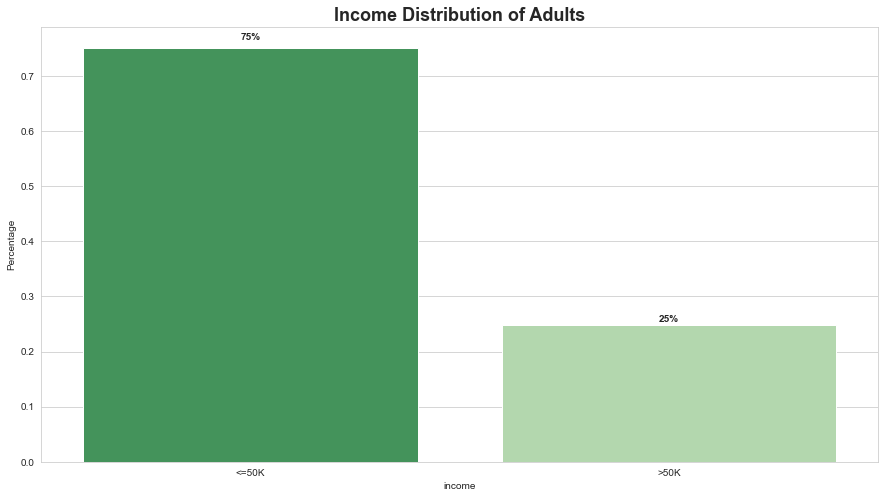

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt  
sns.set_style("whitegrid")
plt.figure(figsize = (15,8))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

>Analysing the target variable(income) it is observed that the number of people earning more than 50K us dollars a year is one third of the people earning less than it.

In [15]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

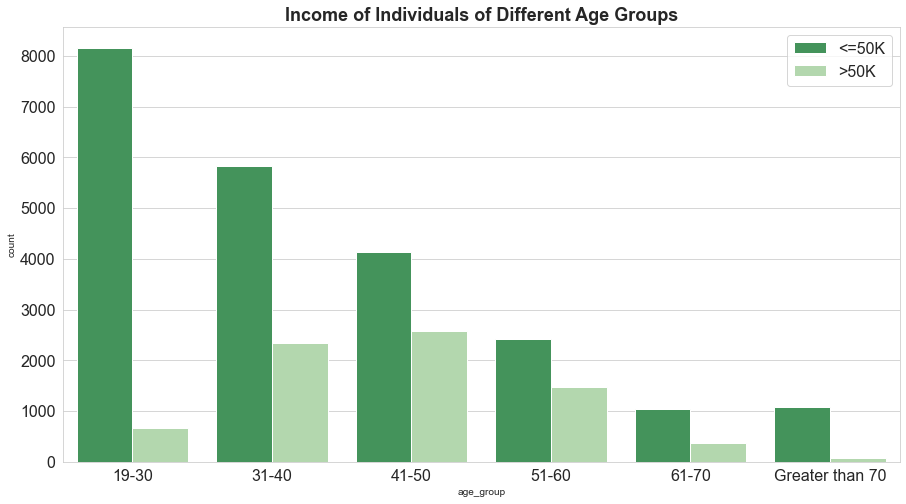

In [16]:
plt.figure(figsize=(15,8))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x=df['age_group'], hue = df['income'], palette='Greens_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

>There is a correlation between age and income. The number of people earning over 50K dollars increases with age up to a certain point. For individuals aged 19-30, the proportion of people earning over 50K dollars is quite low. However, for those in the age groups 41-50 and 51-60, the proportion of people earning more than 50K dollars is similar to those earning less than 50K dollars.

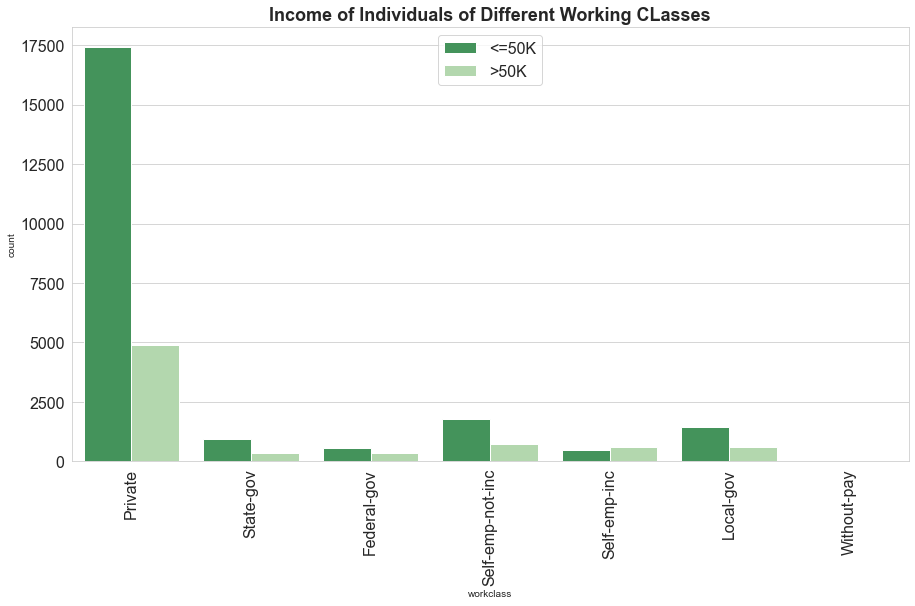

In [17]:
plt.figure(figsize=(15,8))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x=df['workclass'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

>This analysis looked at how people's jobs relate to how much money they earn. The results showed that if you work for yourself, you are more likely to earn a lot of money if your business does well. But if you work in a company that is not owned by you, most people earn less than 50K dollars per year.

>Also observed that people who work for the government have a similar number of people earning more or less than 50K dollars per year. However, some categories of people, like those who don't get paid or have never worked, didn't have enough data to give any useful information.

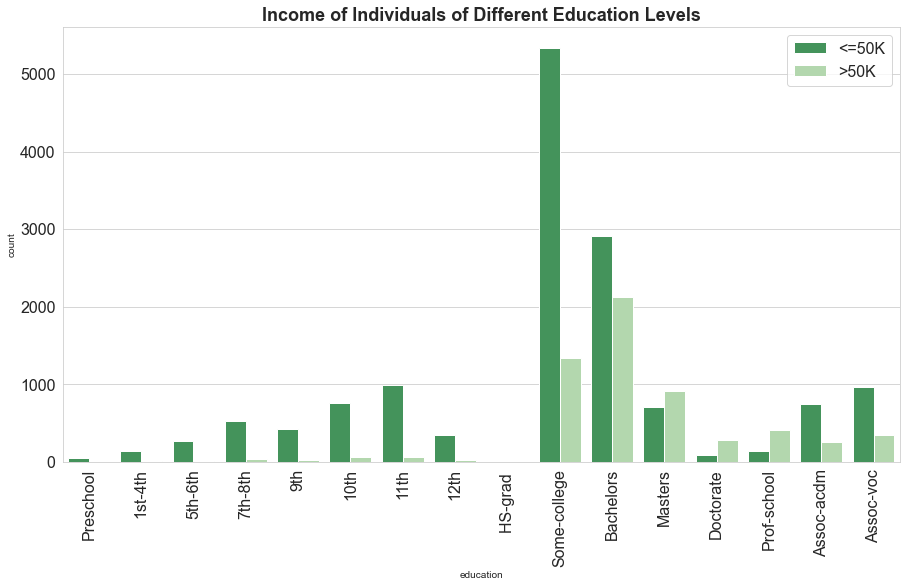

In [18]:
plt.figure(figsize=(15,8))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x=df['education'], hue = df['income'], palette='Greens_r', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

>It found that for people who completed their education up to the 12th standard, which is high school, only a few of them earn more than 50K dollars per year. Most of them earn less than 50K.

>However, for people who have a higher education level like a Bachelor's, Master's, Doctorate, or a Professional degree, more of them earn more than 50K dollars per year than those who earn less than it.

>For people with an Associate degree in academic or vocational fields, only a few of them earn more than 50K dollars per year.

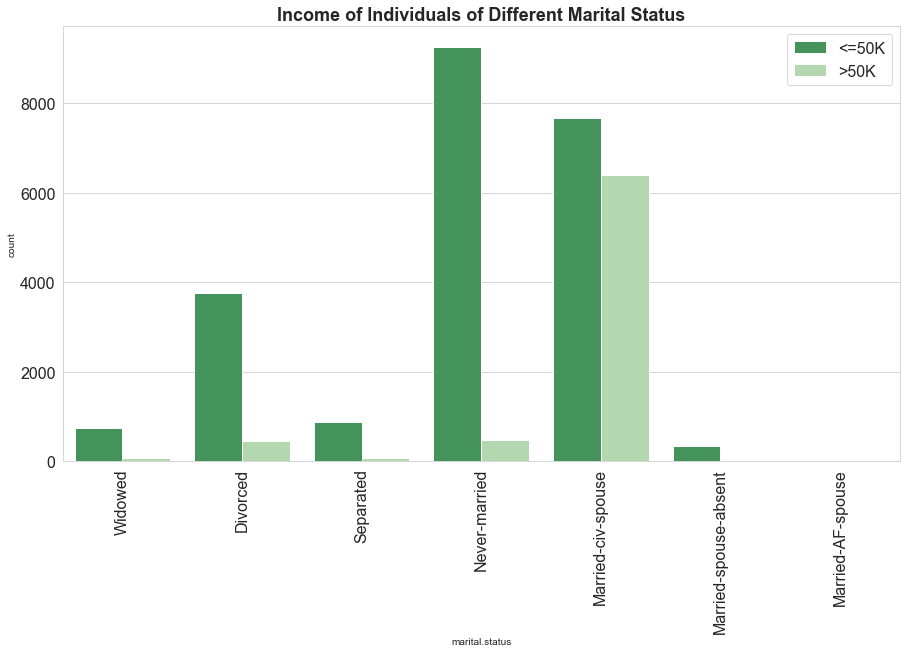

In [19]:
plt.figure(figsize=(15,8))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x=df['marital.status'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

>It found that for the Married-civ-spouse category, there are almost equal number of people who earn more than 50K dollars per year and those who earn less than it.

>However, for the other marital status categories, like Never-married, Divorced, Separated, Widowed, and Married-spouse-absent, less than 25% of the adults earn more than 50K dollars per year.

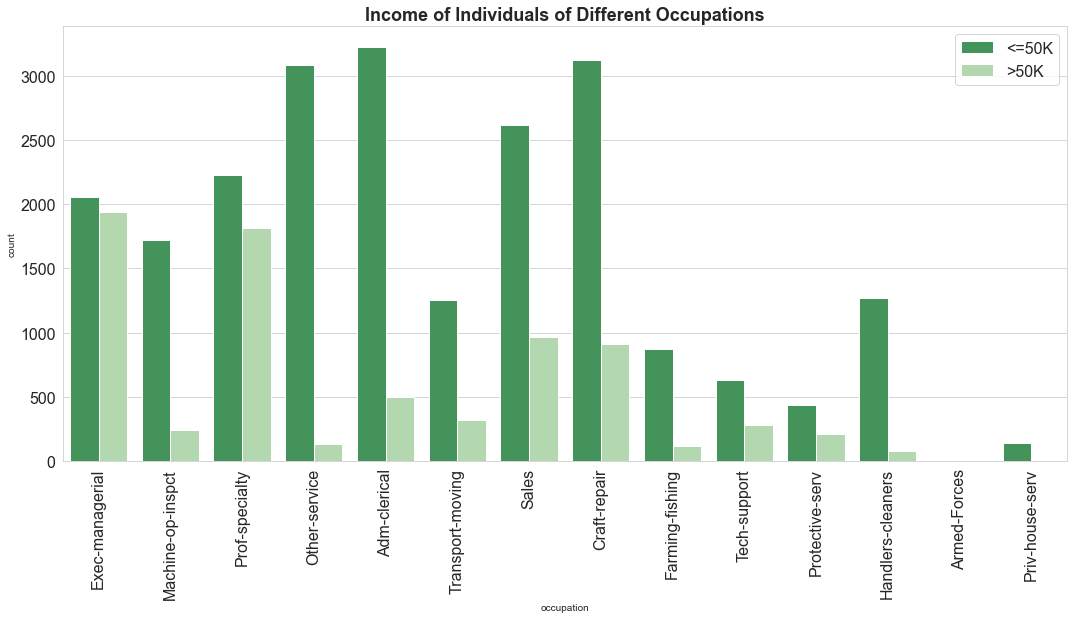

In [20]:
plt.figure(figsize=(18,8))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x=df['occupation'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

>People who work in Executive or Managerial roles have a good chance of earning more than 50K dollars per year, which is similar to the chance of people in Professional and Specialty roles. However, people who work in Farming and Fishing, Machine Operation and Inspection, Other Services, Administrative and Clerical roles, and Transportation and Moving roles are less likely to earn more than 50K dollars per year. For Sales jobs, around 25% of people earn more than 50K dollars per year.

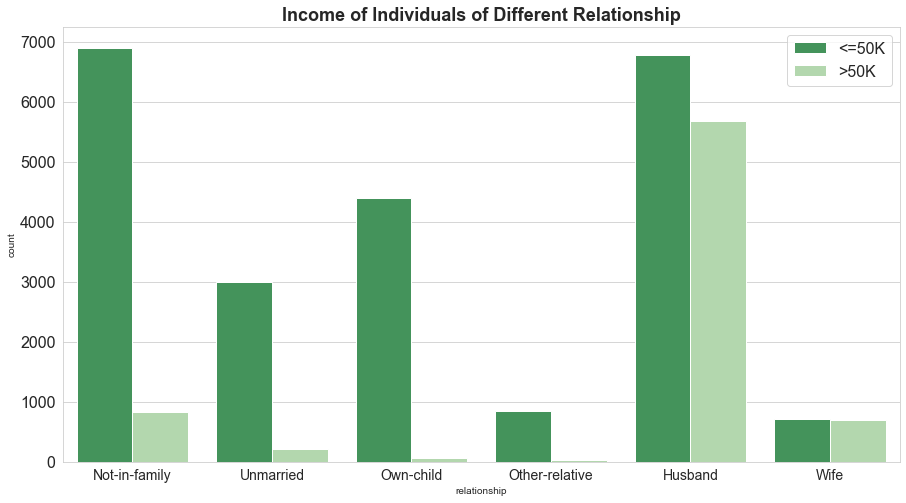

In [21]:
plt.figure(figsize=(15,8))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x=df['relationship'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

>wives have an equal chance of earning more than 50K dollars a year compared to their husbands. However, for unmarried people, there are only a few who earn more than 50K dollars a year.






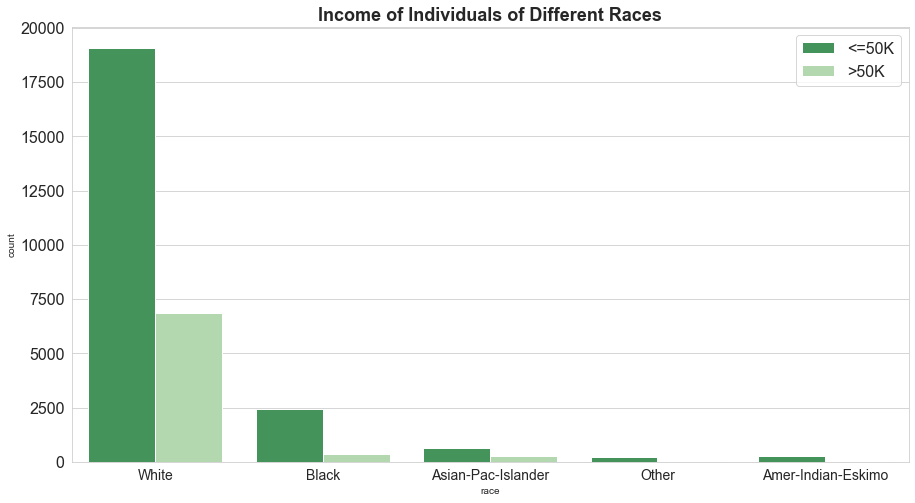

In [22]:
plt.figure(figsize=(15,8))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x=df['race'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

>The dataset has a disproportionate number of people from the White race compared to other races. Therefore, it may not accurately reflect the percentage and relationship of people earning more than 50K dollars per year among different races.

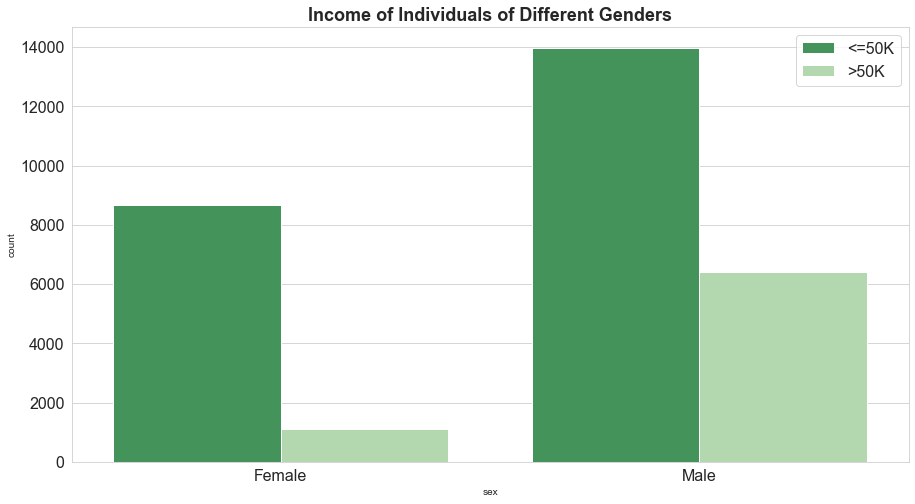

In [23]:
plt.figure(figsize=(15,8))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x=df['sex'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

>There is a big difference in earnings between males and females. Less than 10% of females earn more than 50K dollars per year, whereas close to 33% of males earn more than 50K dollars per year.

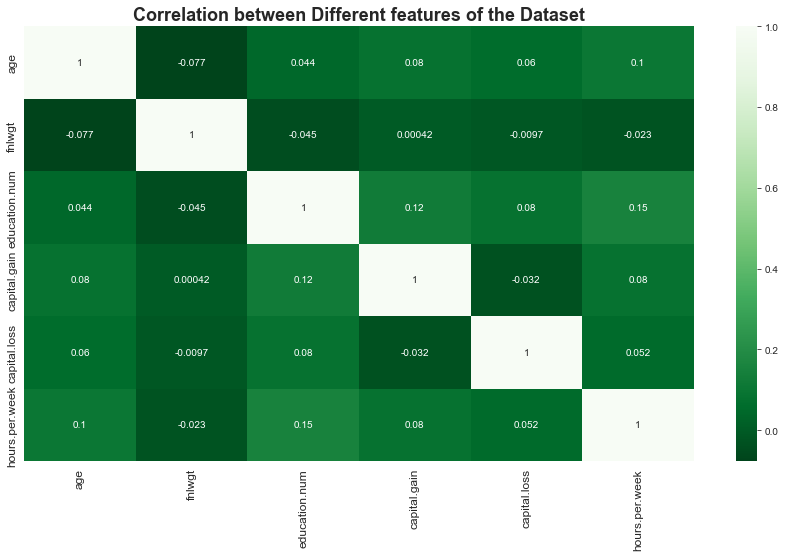

In [24]:
plt.figure(figsize = (15,8))
plt.title("Correlation between Different features of the Dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.show()


> A correlation map to examine if the independent features have any relationship with the dependent feature. The results show that most of the features are positively correlated with the income variable. However,the object data types was excluded from this correlation analysis.

## Check for skewness and outliers in the dataset


In [25]:
df_num = df.select_dtypes("number").columns
df_num

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

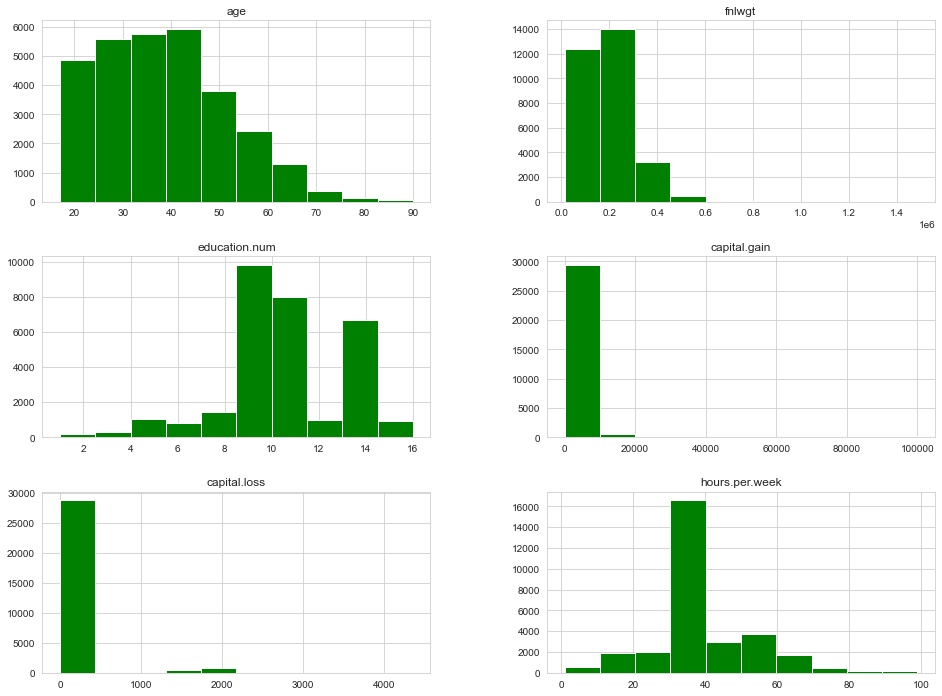

In [26]:
df[df_num].hist(figsize=(16, 12), color='green');

In [27]:
df[df_num].skew().sort_values(ascending= False)

capital.gain      11.902682
capital.loss       4.526380
fnlwgt             1.459220
age                0.530228
hours.per.week     0.330869
education.num     -0.305379
dtype: float64

>The "capital.gain" and "capital.loss" columns have the highest skewed values

In [28]:
skewed_cols = ["capital.gain", "capital.loss"]

In [29]:
def check_outliers():
        outliers_cols = []
    
        for col in df.select_dtypes("number"): 
            q1 = df[col].quantile(.25)
            q3 = df[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                outliers_cols.append(col)

        return outliers_cols

In [30]:
#putting the function into a variable
outlier_columns = check_outliers()

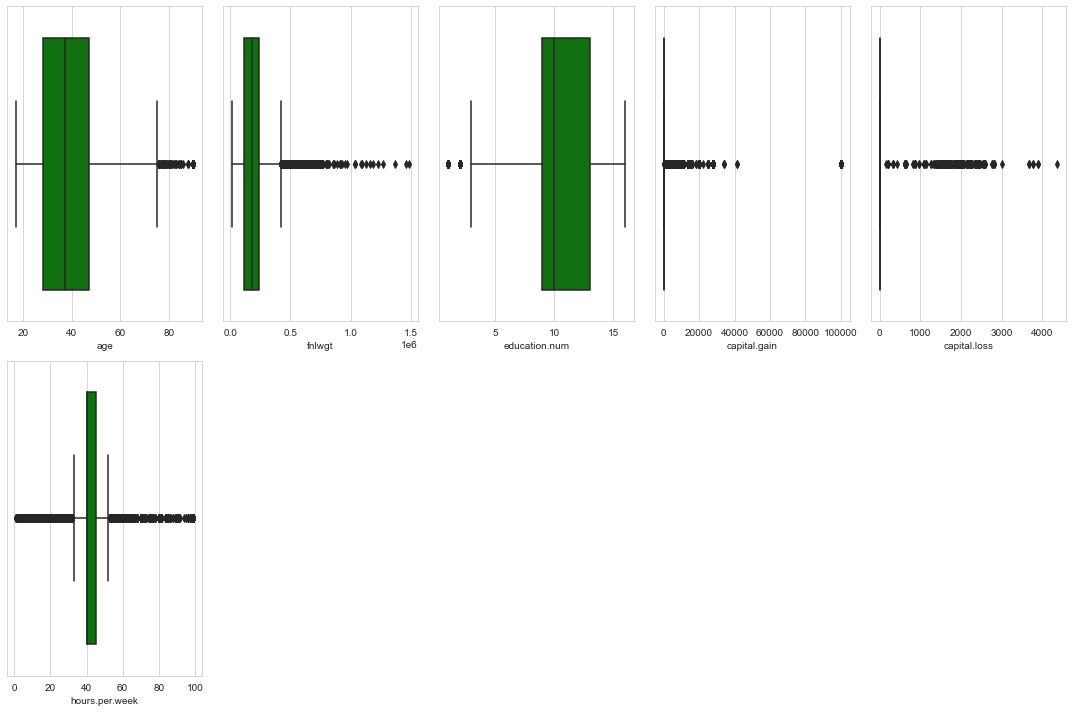

In [31]:
#Visualizing the boxplot for the columns with outliers
plt.figure(figsize=(15,10))
for index, col in enumerate(outlier_columns):
    plt.subplot(2,5, index+1)
    sns.boxplot(x=df[col],color='green')
plt.tight_layout()
plt.show()

## Transform the skewed and outliers columns

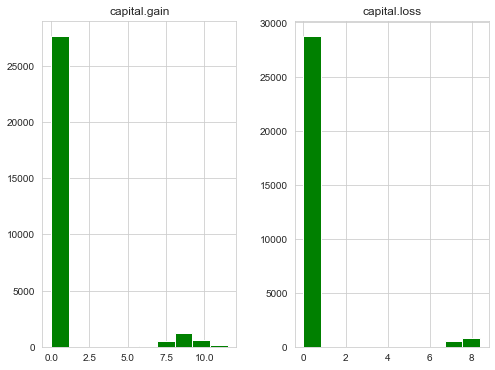

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Transform the skewed columns
df[skewed_cols] = df[skewed_cols].apply(lambda x: np.log(x + 1))
df[skewed_cols].hist(figsize=(8, 6), color=('green'));#Columns distributed a little bit evenly

In [33]:
#Scaling the columns with outliers
df[outlier_columns] = scaler.fit_transform(df[outlier_columns])
df[outlier_columns]

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
1,3.316630,-0.538790,-0.439738,-0.301013,5.030969,-1.914161
3,1.184831,-0.467906,-2.400559,-0.301013,4.961657,-0.077734
4,0.195067,0.708645,-0.047574,-0.301013,4.961657,-0.077734
5,-0.337883,0.256222,-0.439738,-0.301013,4.940408,0.339636
6,-0.033340,-0.370964,-1.616231,-0.301013,4.940408,-0.077734
...,...,...,...,...,...,...
32556,-1.251511,1.139203,-0.047574,-0.301013,-0.222715,-0.077734
32557,-0.870832,0.638972,0.736754,-0.301013,-0.222715,-0.244682
32558,0.118931,-0.335252,-0.439738,-0.301013,-0.222715,-0.077734
32559,1.489374,-0.358575,-0.439738,-0.301013,-0.222715,-0.077734


In [34]:
#Identify categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

#Convert categorical columns to numeric values using LabelEncoder
le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [35]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group
1,3.316630,2,-0.538790,11,-0.439738,6,3,1,4,0,-0.301013,5.030969,-1.914161,38,0,5
3,1.184831,2,-0.467906,5,-2.400559,0,6,4,4,0,-0.301013,4.961657,-0.077734,38,0,3
4,0.195067,2,0.708645,15,-0.047574,5,9,3,4,0,-0.301013,4.961657,-0.077734,38,0,2
5,-0.337883,2,0.256222,11,-0.439738,0,7,4,4,0,-0.301013,4.940408,0.339636,38,0,1
6,-0.033340,2,-0.370964,0,-1.616231,5,0,4,4,1,-0.301013,4.940408,-0.077734,38,0,1


In [36]:
x = df[['age','workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex',]]
y = df['income']
    
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Model selection
>Select the appropriate machine learning model(s) for the given problem, train the model on the training set, and evaluate its performance on the testing set.

In [37]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

## Model Evaluation
>Evaluate the performance of the model using various metrics such as accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.

In [38]:
#Evaluation metrics
print('Accuracy Score (Logistic Regression):', accuracy_score(y_test, lr_pred))
print('Accuracy Score (Decision Tree):', accuracy_score(y_test, dt_pred))
print('Accuracy Score (Random Forest):', accuracy_score(y_test, rf_pred))

print('Precision Score (Logistic Regression):', precision_score(y_test, lr_pred))
print('Precision Score (Decision Tree):', precision_score(y_test, dt_pred))
print('Precision Score (Random Forest):', precision_score(y_test, rf_pred))

print('Recall Score (Logistic Regression):', recall_score(y_test, lr_pred))
print('Recall Score (Decision Tree):', recall_score(y_test, dt_pred))
print('Recall Score (Random Forest):', recall_score(y_test, rf_pred))

print('F1 Score (Logistic Regression):', f1_score(y_test, lr_pred))
print('F1 Score (Decision Tree):', f1_score(y_test, dt_pred))
print('F1 Score (Random Forest):', f1_score(y_test, rf_pred))

print('ROC-AUC Score (Logistic Regression):', roc_auc_score(y_test, lr_pred))
print('ROC-AUC Score (Decision Tree):', roc_auc_score(y_test, dt_pred))
print('ROC-AUC Score (Random Forest):', roc_auc_score(y_test, rf_pred))

print('Confusion Matrix (Logistic Regression):\n', confusion_matrix(y_test, lr_pred))
print('Confusion Matrix (Decision Tree):\n', confusion_matrix(y_test, dt_pred))
print('Confusion Matrix (Random Forest):\n', confusion_matrix(y_test, rf_pred))

Accuracy Score (Logistic Regression): 0.7381070777391016
Accuracy Score (Decision Tree): 0.7787170561909498
Accuracy Score (Random Forest): 0.8019227581634344
Precision Score (Logistic Regression): 0.41596638655462187
Precision Score (Decision Tree): 0.5589706933523946
Precision Score (Random Forest): 0.6140613313388182
Recall Score (Logistic Regression): 0.132
Recall Score (Decision Tree): 0.5213333333333333
Recall Score (Random Forest): 0.5473333333333333
F1 Score (Logistic Regression): 0.20040485829959517
F1 Score (Decision Tree): 0.5394963780614005
F1 Score (Random Forest): 0.578780401832922
ROC-AUC Score (Logistic Regression): 0.535335980586808
ROC-AUC Score (Decision Tree): 0.6926101919258768
ROC-AUC Score (Random Forest): 0.7167507169644828
Confusion Matrix (Logistic Regression):
 [[4255  278]
 [1302  198]]
Confusion Matrix (Decision Tree):
 [[3916  617]
 [ 718  782]]
Confusion Matrix (Random Forest):
 [[4017  516]
 [ 679  821]]


>These are the evaluation metrics for three different models - Logistic Regression, Decision Tree, and Random Forest applied on the given dataset. Here's a brief explanation of the metrics:

>>Accuracy Score: It is the number of correct predictions made by the model divided by the total number of predictions. It tells us how well the model is able to predict the target variable.

>>Precision Score: It is the ratio of true positives to the total number of predicted positives. It tells us how precise the model is in predicting the positive class.

>>Recall Score: It is the ratio of true positives to the total number of actual positives. It tells us how well the model is able to identify the positive class.

>>F1 Score: It is the harmonic mean of precision and recall. It tells us how well the model is able to balance precision and recall.

>>ROC-AUC Score: It is a performance metric for binary classification problems. It tells us how well the model is able to distinguish between the positive and negative classes.

>>Confusion Matrix: It is a table used to evaluate the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives.

>Based on the evaluation metrics given, the Random Forest model seems to be performing the best among the three models with the highest accuracy, precision, recall, F1-score, and ROC-AUC score. It also has the lowest number of false negatives and false positives in its confusion matrix, which is important in this context where we want to predict high-income individuals accurately. Therefore, the Random Forest model is recommended for use on the training data.

## Final Model Selection and Training
>Select the final model based on its performance on the testing set and train it on the entire dataset.

In [43]:
#Define the Random Forest model with optimized hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1)

#Fit the model on the entire training dataset
rf.fit(X_train, y_train)

#Predict the income values for both training and testing datasets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#Calculate the accuracy score for both training and testing datasets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy Score:", train_accuracy)
print("Testing Accuracy Score:", test_accuracy)


Training Accuracy Score: 0.927638940693771
Testing Accuracy Score: 0.8085529587270015


In [46]:
import joblib

joblib.dump(rf, 'random_forest_model.joblib')
#Load the saved model
model = joblib.load('random_forest_model.joblib')
def preprocess_data(df):
    #Identify categorical columns
    cat_columns = df.select_dtypes(include=['object']).columns.tolist()

    #Convert categorical columns to numeric values using LabelEncoder
    le = LabelEncoder()
    for col in cat_columns:
        df[col] = le.fit_transform(df[col])
    # Scale the continuous variables
    scaler = StandardScaler()
    cont_vars = ['age']
    df[cont_vars] = scaler.fit_transform(df[cont_vars])

    return df

#new data
new_data = {
    'age': [30],
    'workclass': ['Private'],
    'education': ['Bachelors'],
    'marital.status': ['Married-civ-spouse'],
    'occupation': ['Prof-specialty'],
    'relationship': ['Husband'],
    'race': ['White'],
    'sex': ['Male']
}

#Convert the dictionary to a pandas dataframe
new_data_df = pd.DataFrame.from_dict(new_data)

#Apply the same preprocessing steps to the new data as the training data
new_data_processed = preprocess_data(new_data_df)

#Make predictions on the new data using the trained model
new_data_predictions = model.predict(new_data_processed)

# Print the predictions
print(new_data_predictions)


[0]


> For a  30-year-old male with a bachelor's degree who works in a private company as a professional specialist,the model predicted[0] which means that the individual represented by the new data is likely to have an income of less than or equal to 50K US dollars per year. This corresponds to the label for the majority class in the training data